In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/USER/Desktop/Kaggle/Credit_card(Cluster)/credit_card_customer_data.csv')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
df.shape

(660, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


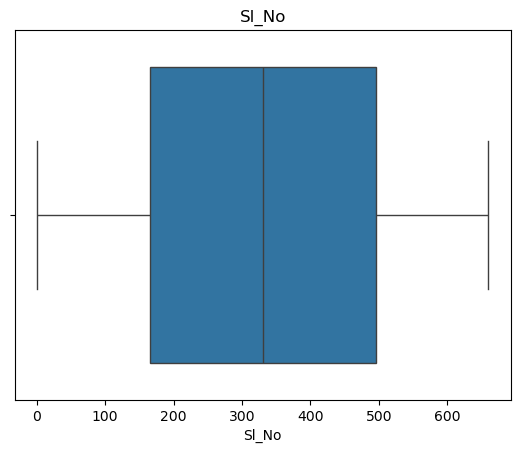

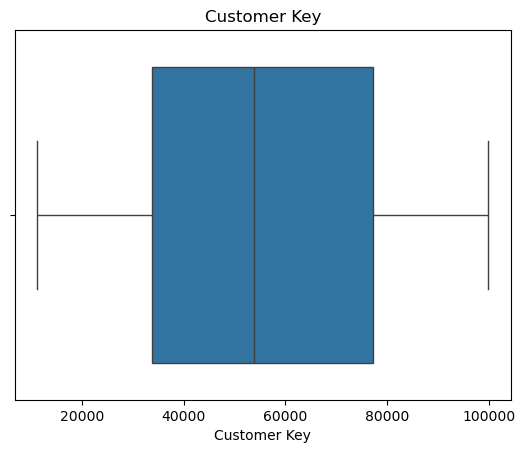

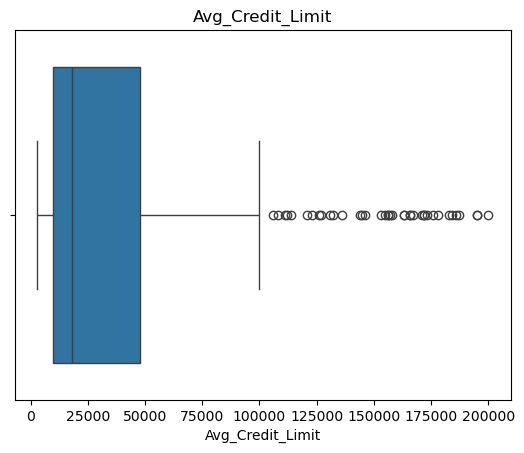

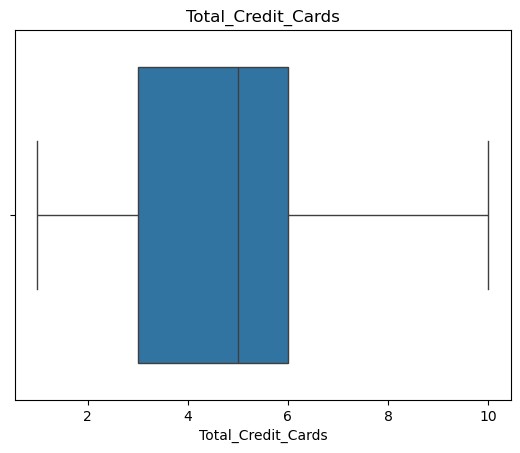

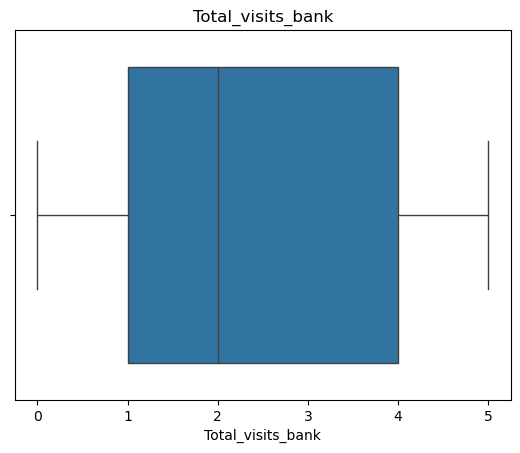

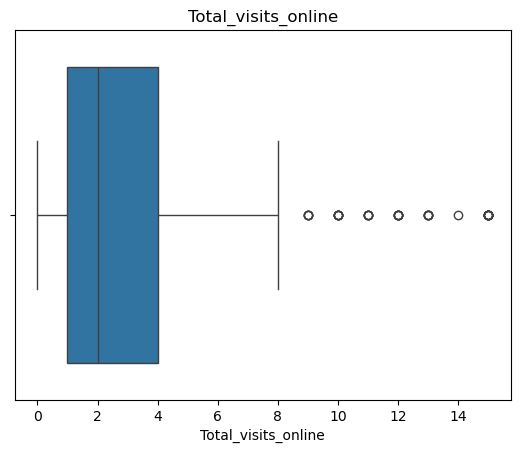

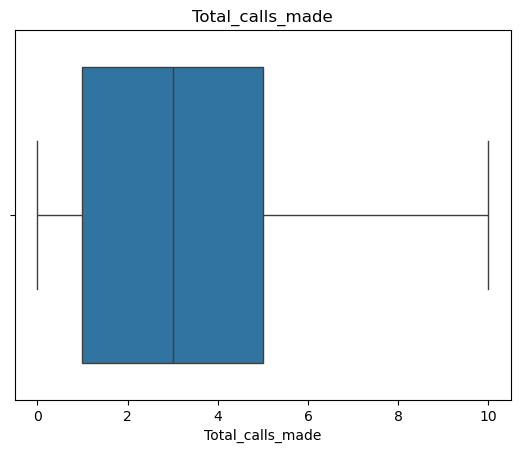

In [7]:
cols = df.columns.tolist()
for i in cols:
    sns.boxplot(x=df[i],data=df)
    plt.title(i)
    plt.show()

In [8]:
print(f"{cols[2]} and {cols[5]} has outliers")

Avg_Credit_Limit and Total_visits_online has outliers


In [9]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [10]:
scaled = scaler.fit_transform(df)

In [11]:
df_scaled=pd.DataFrame(scaled,columns=df.columns)

In [12]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,4.306320e-17,0.578664,-1.000000,-0.500000,0.0,0.500000,1.000000
Customer Key,660.0,2.920757e-02,0.590811,-0.982301,-0.462207,0.0,0.537793,1.059738
Avg_Credit_Limit,660.0,4.361643e-01,0.990144,-0.394737,-0.210526,0.0,0.789474,4.789474
Total_Credit_Cards,660.0,-9.797980e-02,0.722612,-1.333333,-0.666667,0.0,0.333333,1.666667
Total_visits_bank,660.0,1.343434e-01,0.543938,-0.666667,-0.333333,0.0,0.666667,1.000000
Total_visits_online,660.0,2.020202e-01,0.978575,-0.666667,-0.333333,0.0,0.666667,4.333333
Total_calls_made,660.0,1.458333e-01,0.716329,-0.750000,-0.500000,0.0,0.500000,1.750000


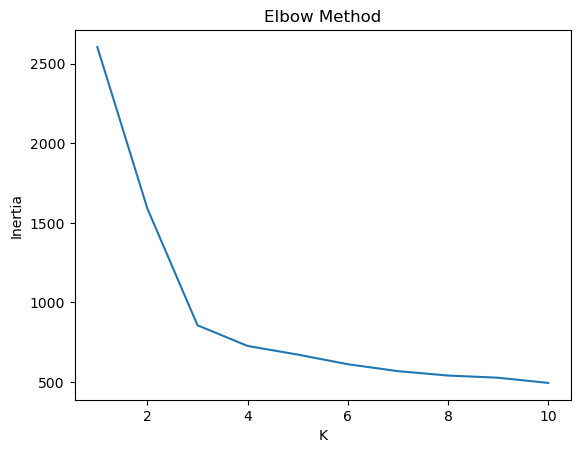

In [13]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1,11):
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(df_scaled)
    inertia.append(km.inertia_)
plt.plot(range(1,11),inertia)
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [14]:
km = KMeans(n_clusters=3,random_state=42)
km.fit(df_scaled)

KMeans(n_clusters=3, random_state=42)

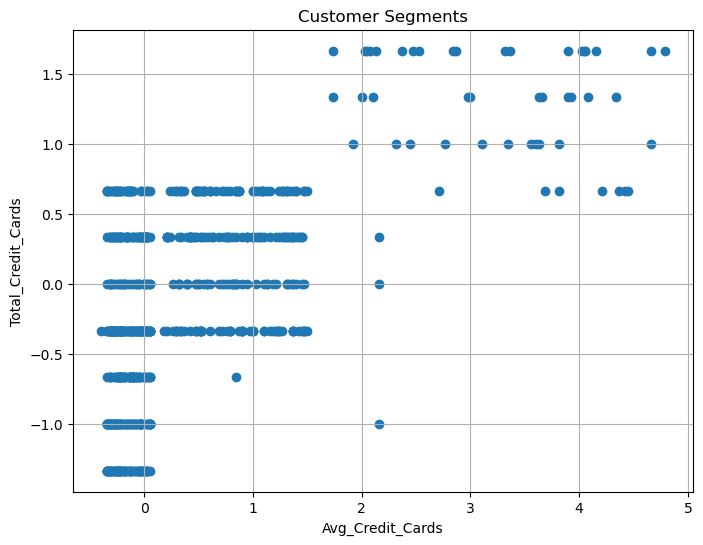

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(df_scaled['Avg_Credit_Limit'],df_scaled['Total_Credit_Cards'])
plt.xlabel("Avg_Credit_Cards")
plt.ylabel("Total_Credit_Cards")
plt.title("Customer Segments")
plt.grid()
plt.show()

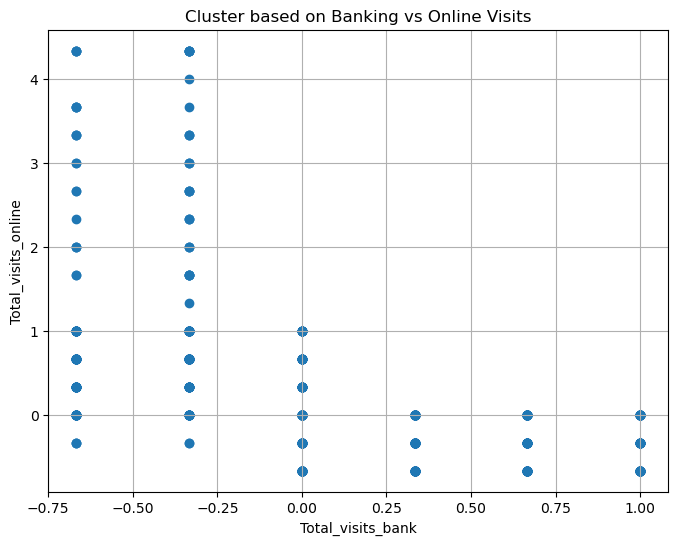

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(df_scaled['Total_visits_bank'],df_scaled['Total_visits_online'])
plt.xlabel("Total_visits_bank")
plt.ylabel("Total_visits_online")
plt.title("Cluster based on Banking vs Online Visits")
plt.grid()
plt.show()

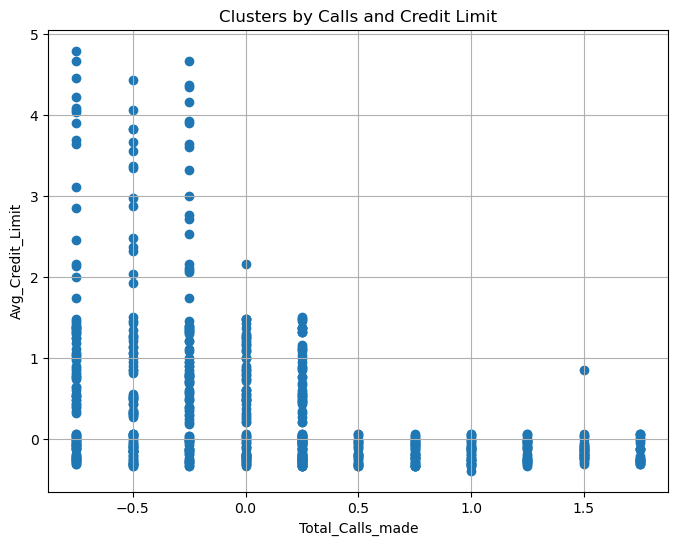

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(df_scaled['Total_calls_made'],df_scaled['Avg_Credit_Limit'],)
plt.ylabel("Avg_Credit_Limit")
plt.xlabel("Total_Calls_made")
plt.title("Clusters by Calls and Credit Limit")
plt.grid()
plt.show()